# Diabetes classification using KNN

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/sahil-gidwani/ML/main/dataset/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.isnull().any()

Pregnancies      False
Glucose          False
BloodPressure    False
SkinThickness    False
Insulin          False
BMI              False
Pedigree         False
Age              False
Outcome          False
dtype: bool

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
# Glucose, BloodPressure, SkinThickness, Insulin, BMI columns have values 0 which does not make sense, hence are missing values
data_copy = data.copy(deep = True)
data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
data_copy.isnull().sum()

Pregnancies        0
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Pedigree           0
Age                0
Outcome            0
dtype: int64

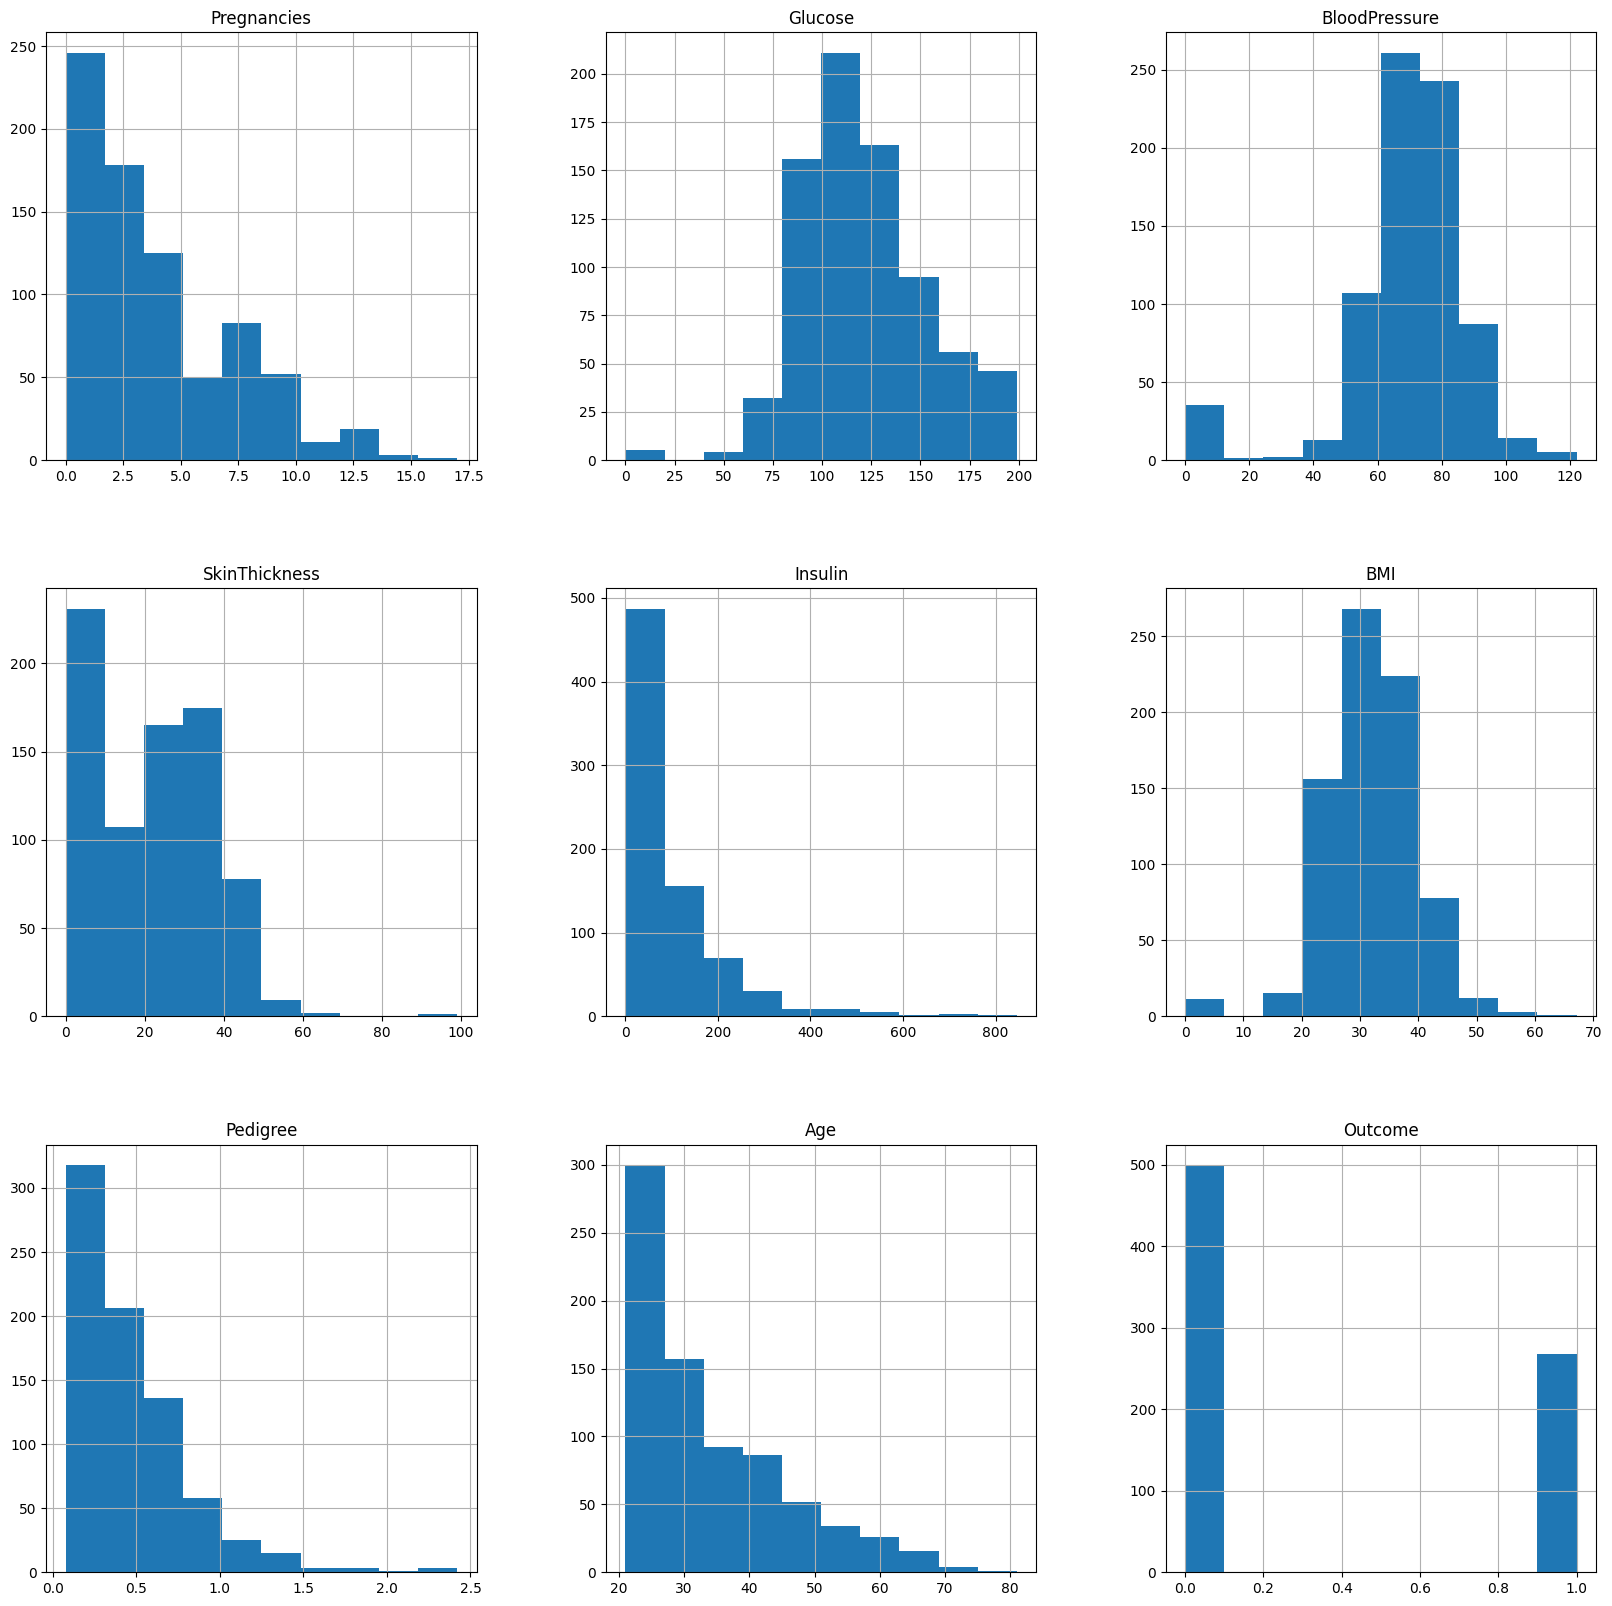

In [6]:
# To fill these Nan values the data distribution needs to be understood
p = data.hist(figsize = (20, 20))

In [7]:
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace = True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace = True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(), inplace = True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(), inplace = True)
data_copy['BMI'].fillna(data_copy['BMI'].median(), inplace = True)

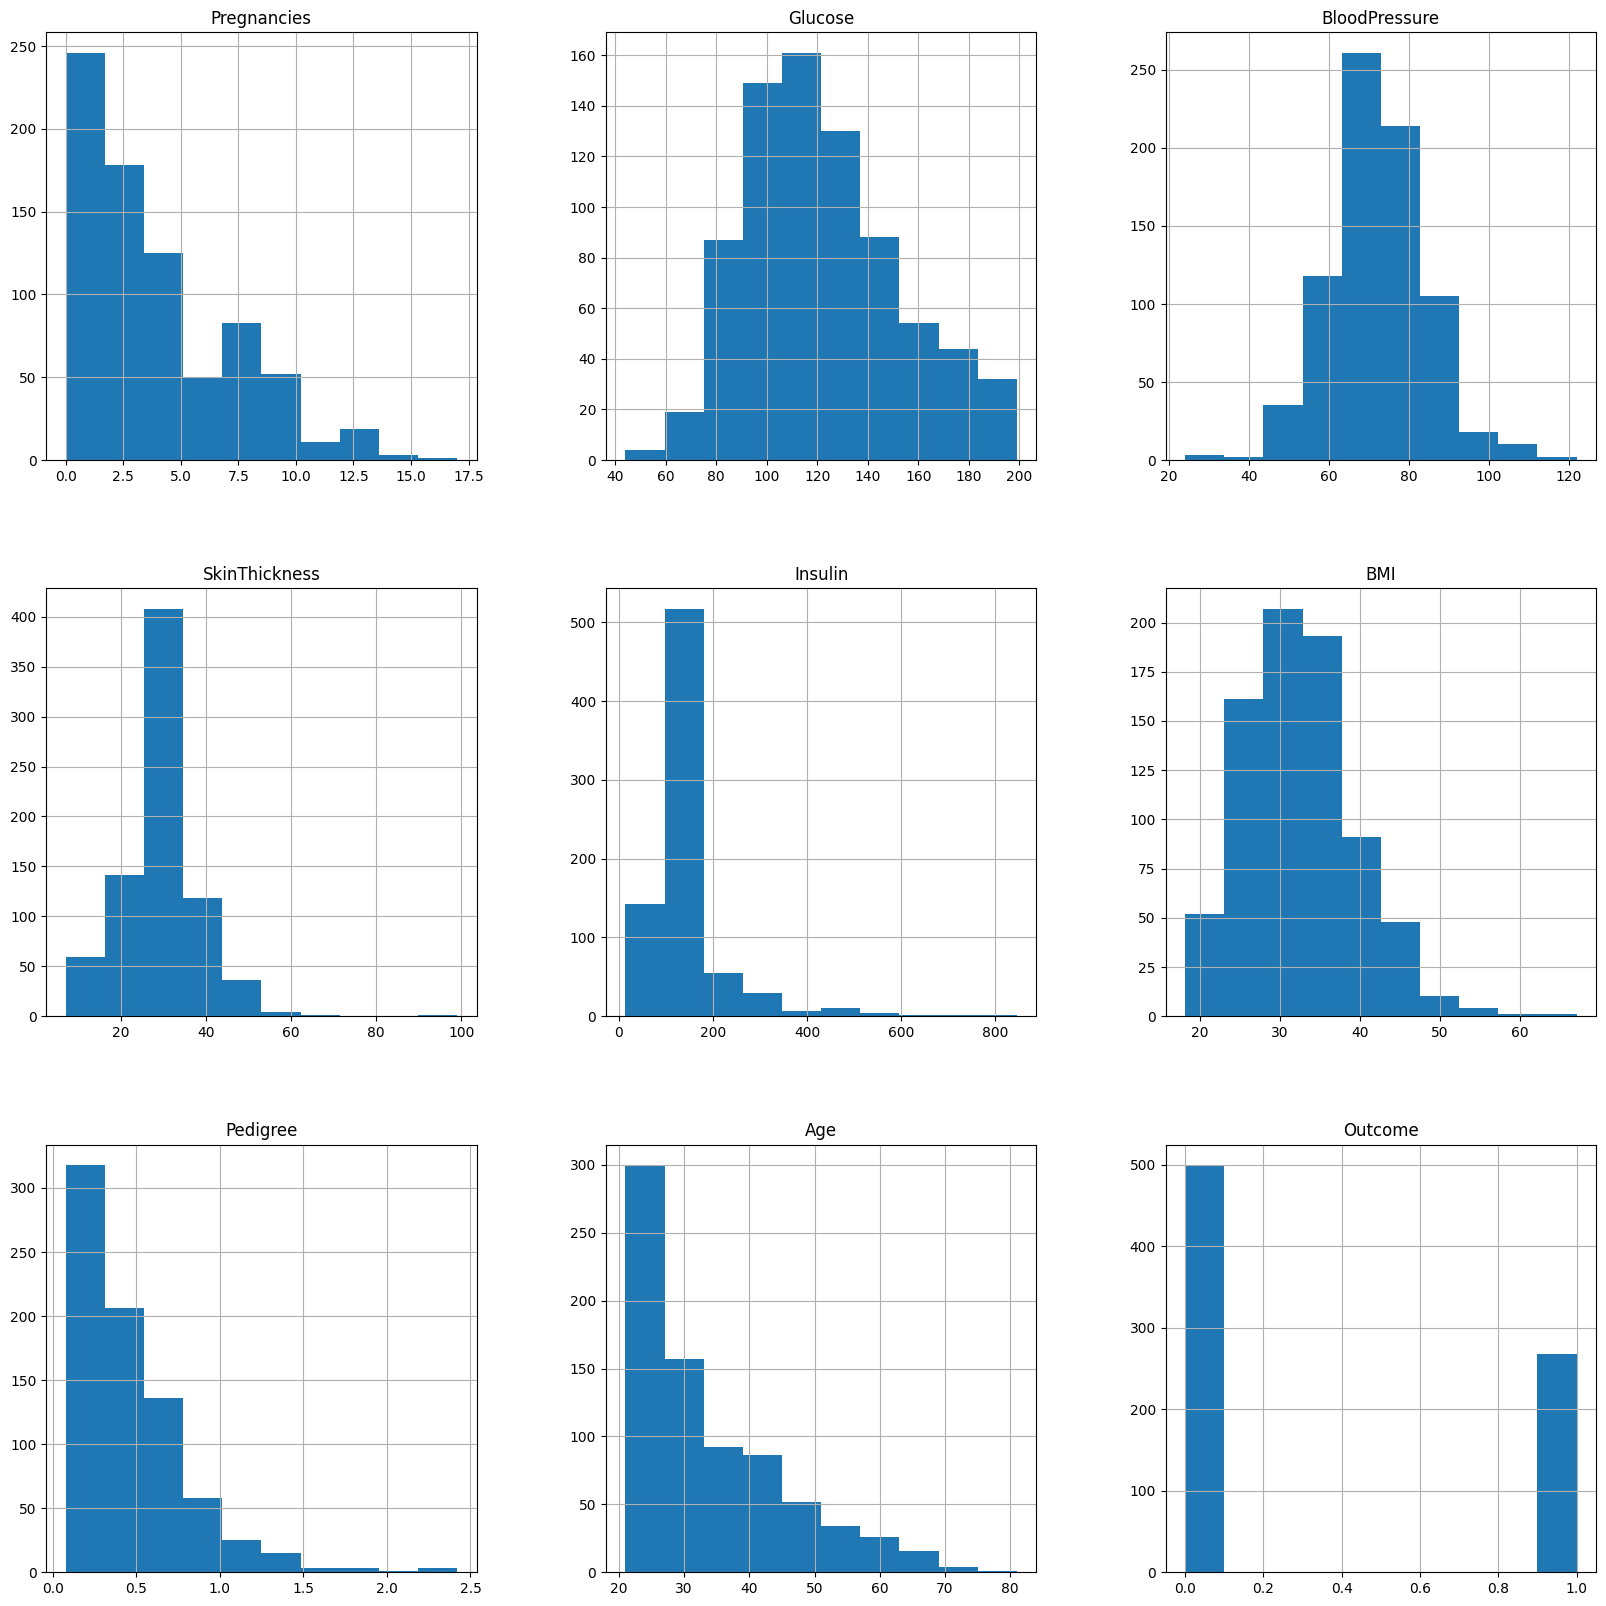

In [8]:
p = data_copy.hist(figsize = (20, 20))

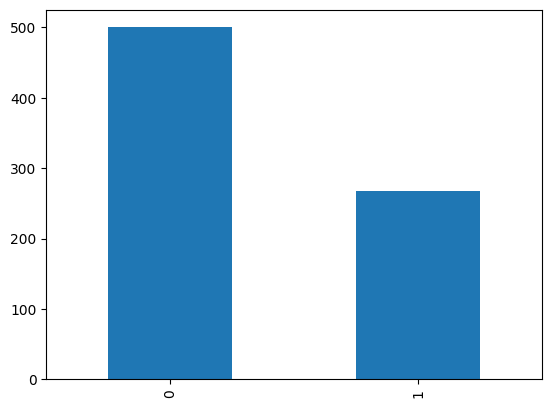

In [9]:
p = data.Outcome.value_counts().plot(kind = "bar")

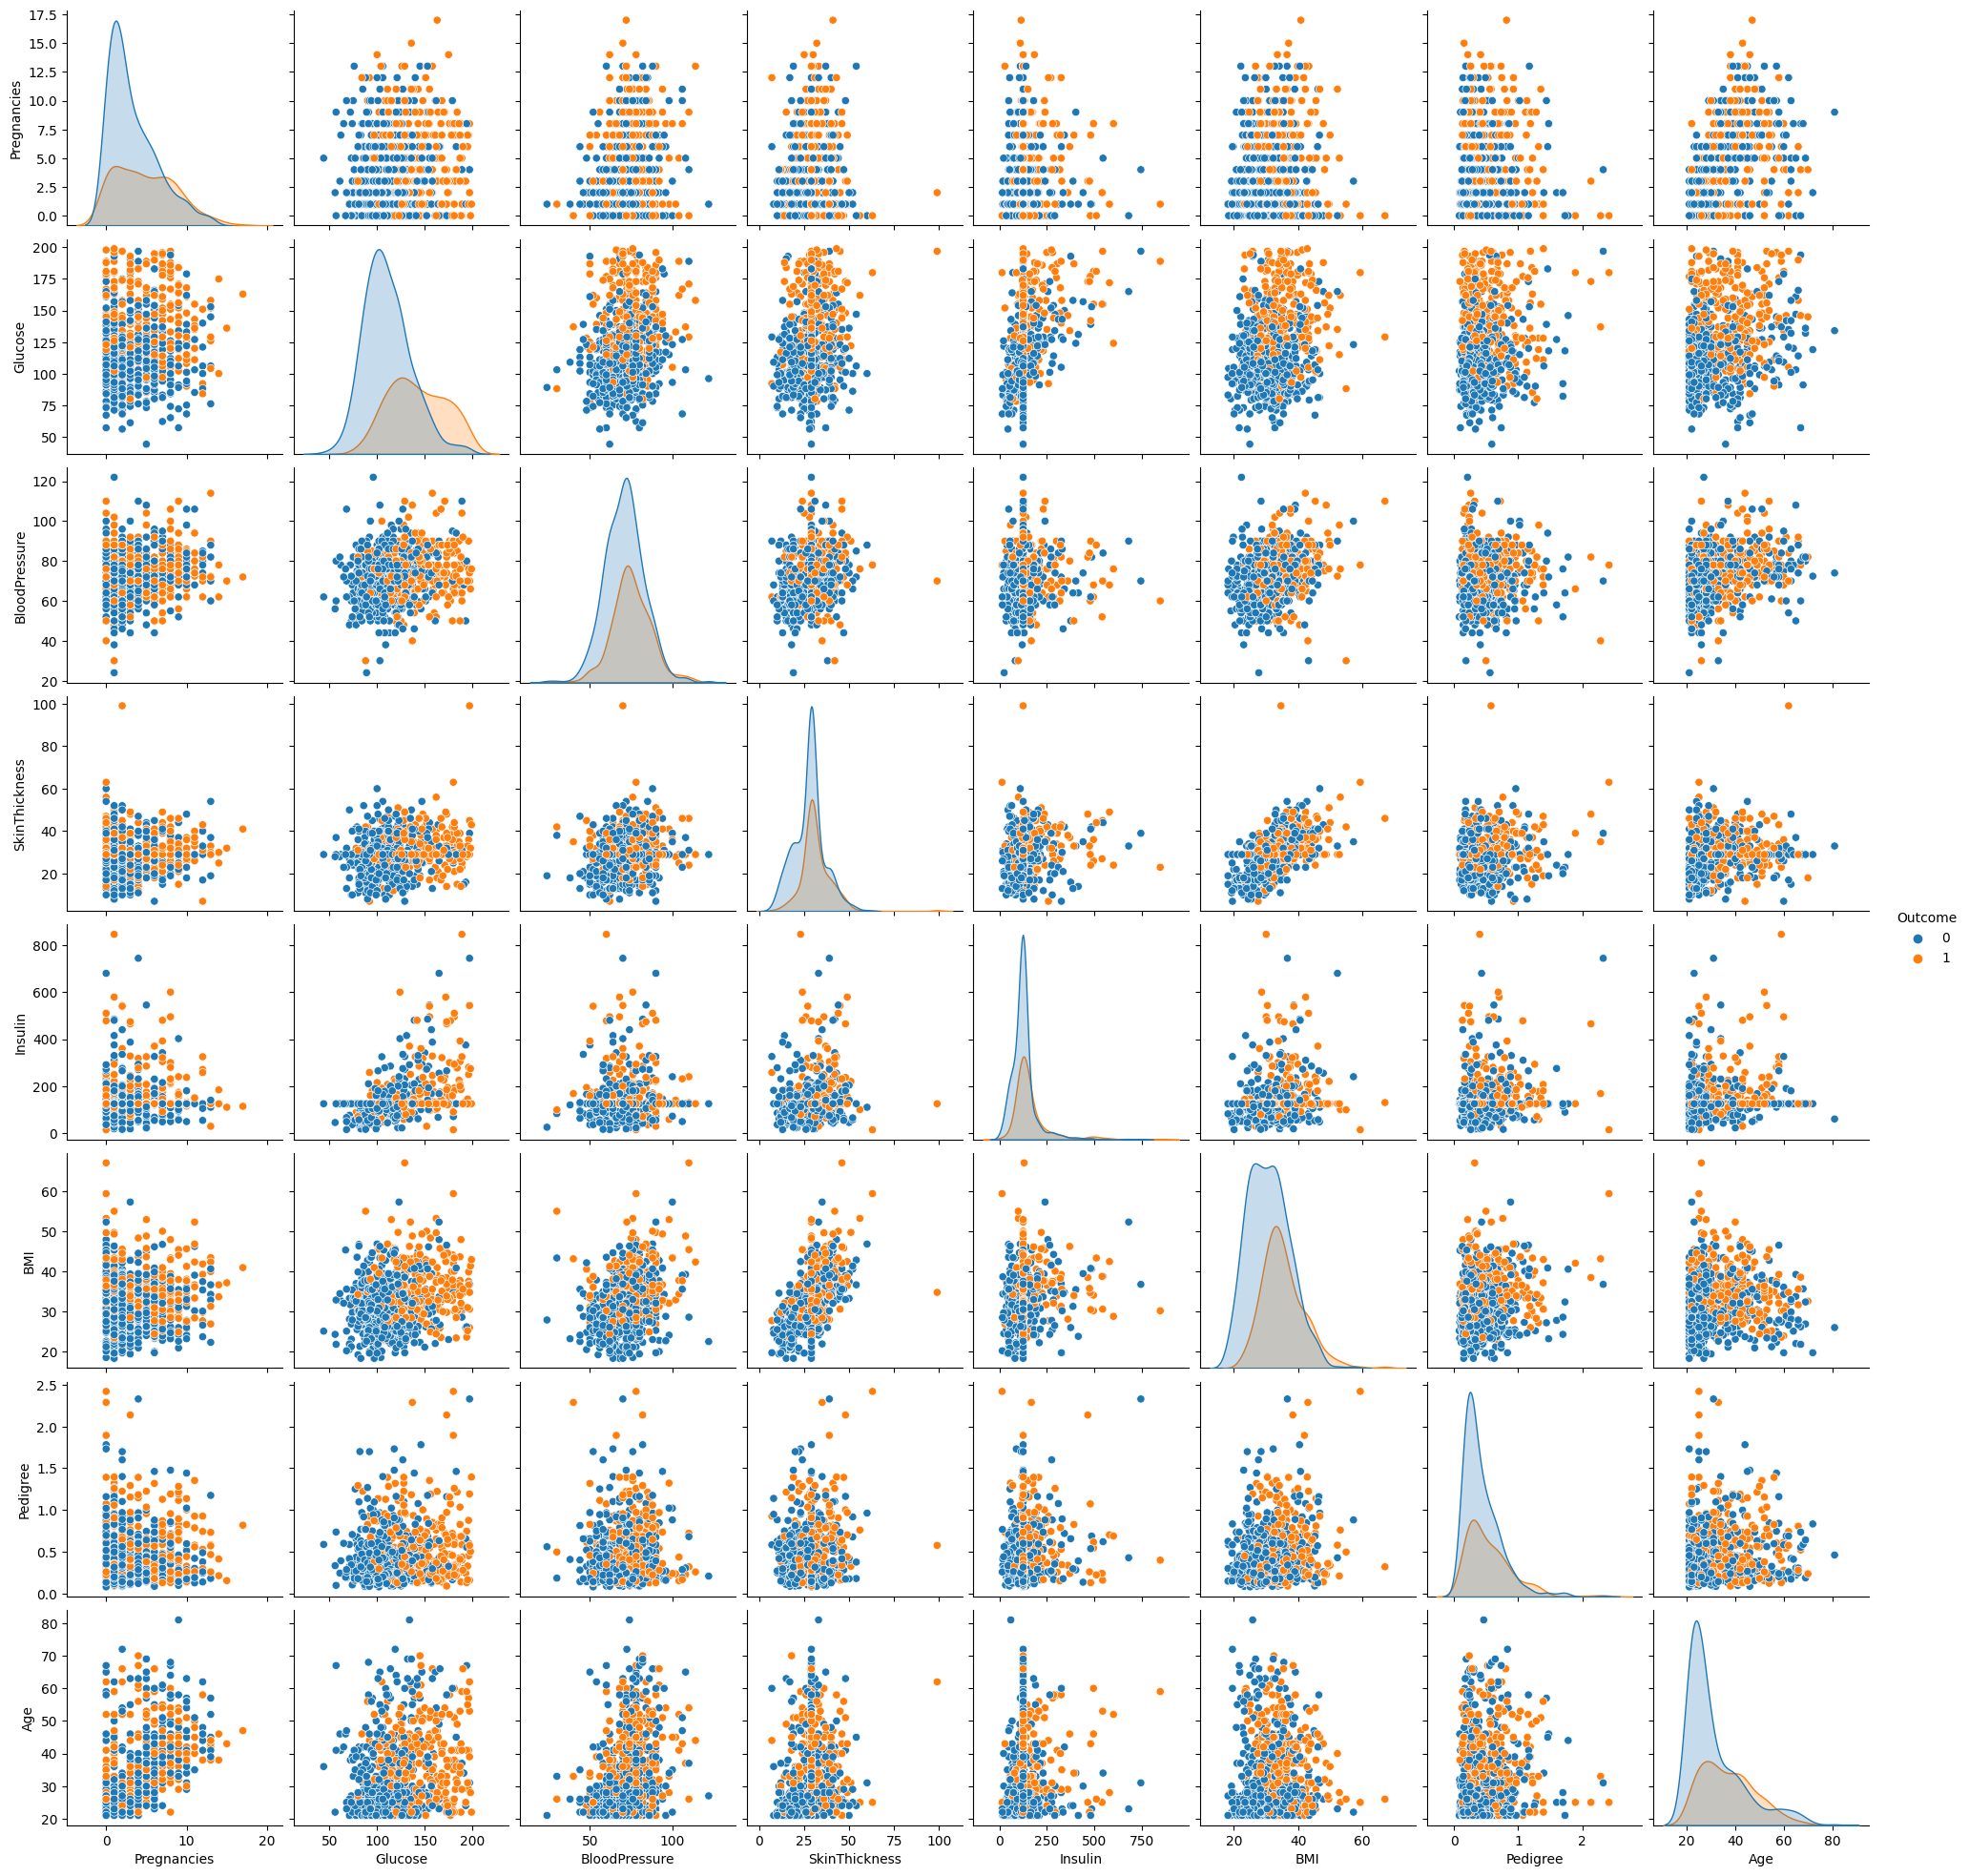

In [10]:
# The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients
import seaborn as sns
p = sns.pairplot(data_copy, hue = 'Outcome')

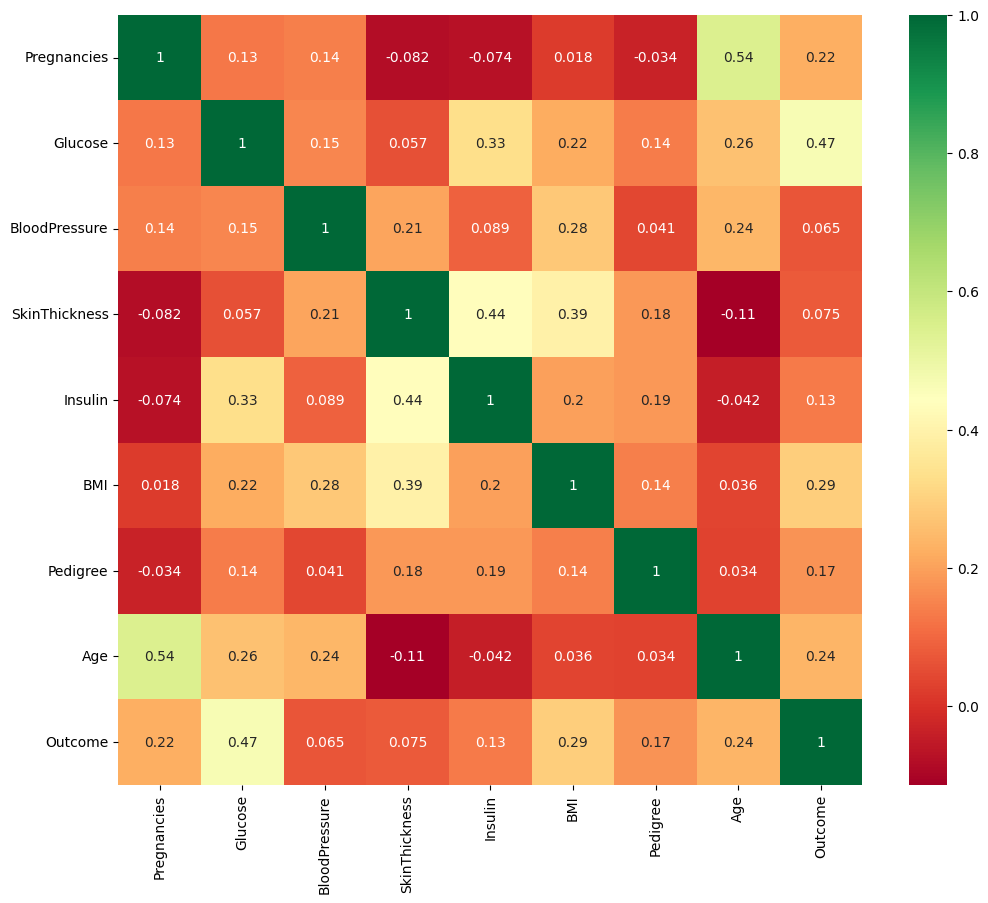

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 10))
p = sns.heatmap(data.corr(), annot = True, cmap ='RdYlGn')

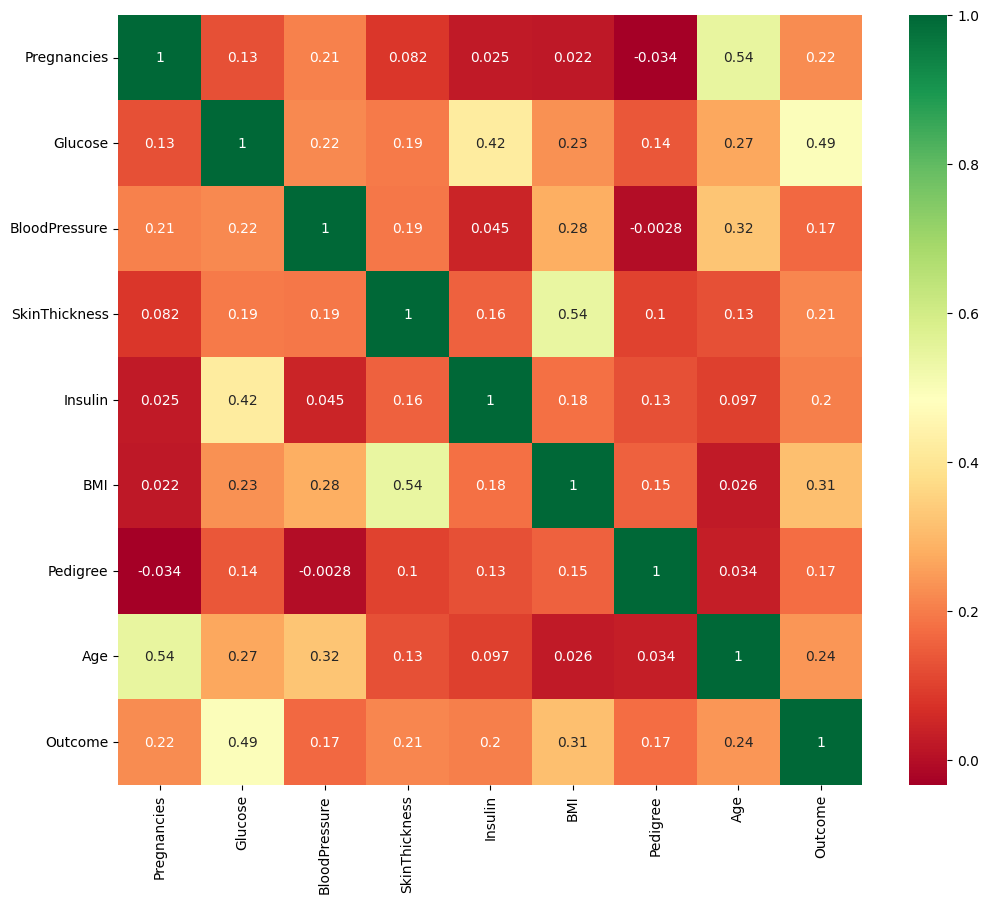

In [12]:
plt.figure(figsize = (12, 10))
p = sns.heatmap(data_copy.corr(), annot = True, cmap ='RdYlGn')

In [13]:
# StandardScaler is a data preprocessing technique commonly used in machine learning and statistics to scale or standardize the features (variables) of a dataset. It transforms the data in such a way that the scaled features have a mean of 0 and a standard deviation of 1. This process is also known as z-score normalization or standardization.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(data_copy.drop(["Outcome"], axis = 1)), columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [14]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [15]:
Y = data_copy.Outcome

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 42, stratify = Y)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
best_k = None
best_test_score = 0.0

# Choose an odd number to avoid tie situations
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    # knn.score() is a meausre of accuracy = TP + TN / TP + TN + FP + FN
    train_score = knn.score(X_train, Y_train)
    test_score = knn.score(X_test, Y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

    # Check if the current k results in a higher accuracy
    if test_score > best_test_score:
        best_k = k
        best_test_score = test_score

print(f"Best k: {best_k}")

Best k: 11


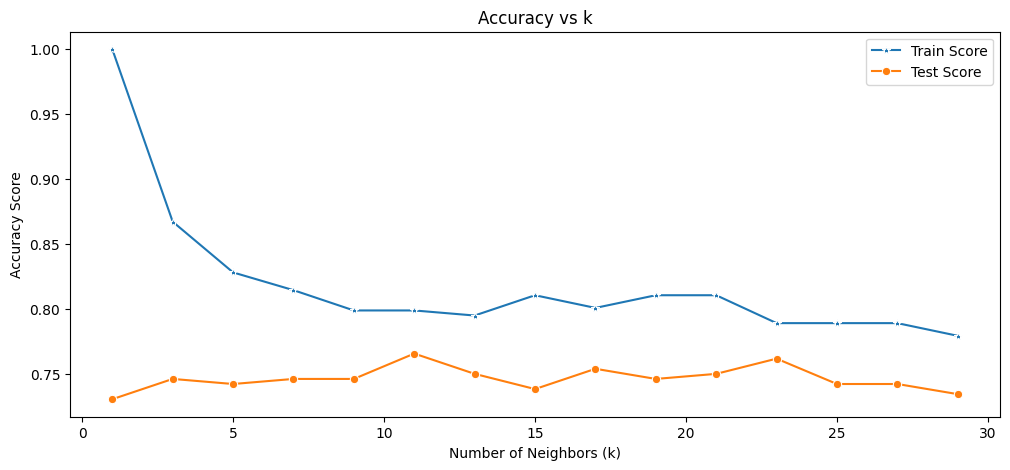

In [18]:
plt.figure(figsize = (12, 5))
plt.title('Accuracy vs k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
p = sns.lineplot(x = range(1, 30, 2), y = train_scores, marker = '*', label = 'Train Score', markers = True)
p = sns.lineplot(x = range(1, 30, 2), y = test_scores, marker = 'o', label = 'Test Score', markers = True)

In [19]:
# Setup a knn classifier with best_k neighbors
knn = KNeighborsClassifier(n_neighbors=best_k)

knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.765625

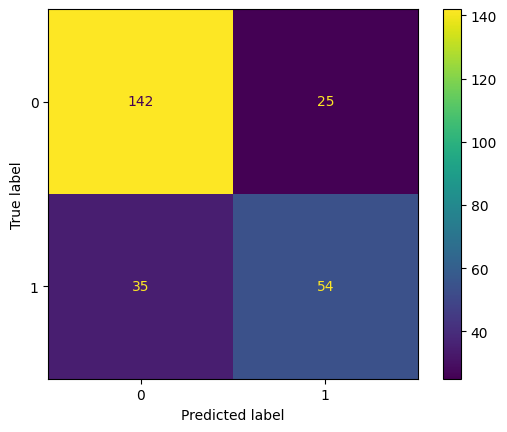

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score

Y_pred = knn.predict(X_test)
cnf_matrix = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=knn.classes_)
disp.plot()

In [21]:
def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]],
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results

model_evaluation(Y_test, Y_pred, "KNN")

,Model,Accuracy,Precision,Recall,F1 SCore,F2 Score
0,KNN,0.765625,0.683544,0.606742,0.642857,0.62069


In [22]:
from sklearn.metrics import auc, roc_auc_score, roc_curve

# predict_proba() is used to predict the class probabilities
# [:,-1]: This slice notation selects the last column of the probability matrix, which corresponds to the probability of the positive class
Y_pred_proba = knn.predict_proba(X_test)[:,-1]
fpr, tpr, threshold = roc_curve(Y_test, Y_pred_proba)

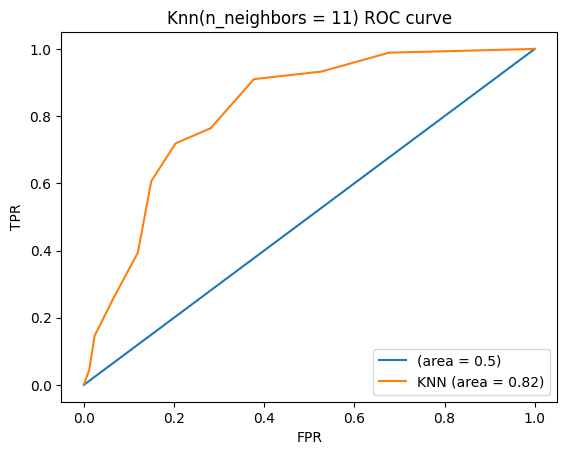

In [23]:
classifier_roc_auc = roc_auc_score(Y_test, Y_pred_proba)
plt.plot([0,1], [0,1], label = "(area = 0.5)")

plt.plot(fpr, tpr, label ='KNN (area = %0.2f)' % classifier_roc_auc)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title(f'Knn(n_neighbors = {best_k}) ROC curve')
plt.legend(loc = "lower right", fontsize = "medium")
plt.show()